In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#resad the train data
df = pd.read_csv('train.csv')

'''
survival        Survival target columns
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd) 1が金持ち
name            Name
sex             Sex #名義特徴量
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation 乗り込んだ港　#名義特徴量
'''

'\nsurvival        Survival target columns\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd) 1\xe3\x81\x8c\xe9\x87\x91\xe6\x8c\x81\xe3\x81\xa1\nname            Name\nsex             Sex #\xe5\x90\x8d\xe7\xbe\xa9\xe7\x89\xb9\xe5\xbe\xb4\xe9\x87\x8f\nage             Age\nsibsp           Number of Siblings/Spouses Aboard\nparch           Number of Parents/Children Aboard\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation \xe4\xb9\x97\xe3\x82\x8a\xe8\xbe\xbc\xe3\x82\x93\xe3\x81\xa0\xe6\xb8\xaf\xe3\x80\x80#\xe5\x90\x8d\xe7\xbe\xa9\xe7\x89\xb9\xe5\xbe\xb4\xe9\x87\x8f\n'

In [2]:
#check the data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
#check the missing value
#Age,Cabin,Embarked　has missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#insert median value to missing age value
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
df['Age'] = imr.fit_transform(df[['Age']].values)

In [5]:
#convert string to integer classifires with Embarked
embarked_mapping = {'C':1,'Q':2,'S':3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
#insert most frequenct value into emberked value
imr = Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
df['Embarked'] = imr.fit_transform(df[['Embarked']].values)
#inv_class_mapping = {v:k for k,v in embarked_mapping.items()}
#df['Embarked'] = df['Embarked'].map(inv_class_mapping)

In [6]:
#convert string to integer classifiers.
#Sex: female=0,male=1
sex_mapping = {'female':0,'male':1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [7]:
#y = df['Survived'].values
df_train = df.loc[:,[u'Survived',u'PassengerId', u'Pclass', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Fare',  u'Embarked']]

# Pclass,sex,sibsp,parch,embarked

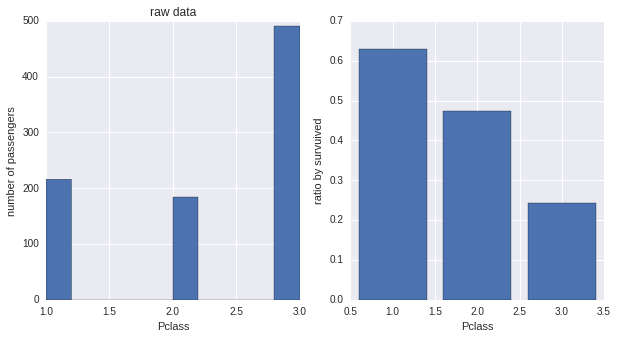

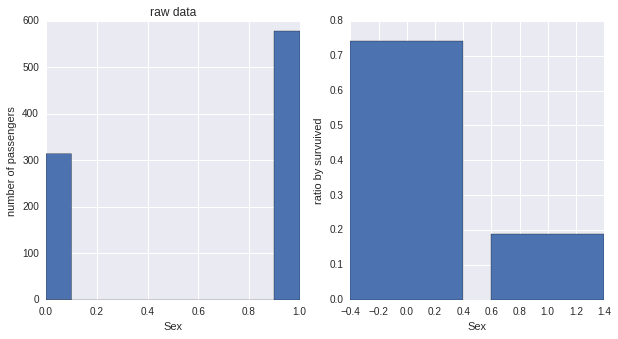

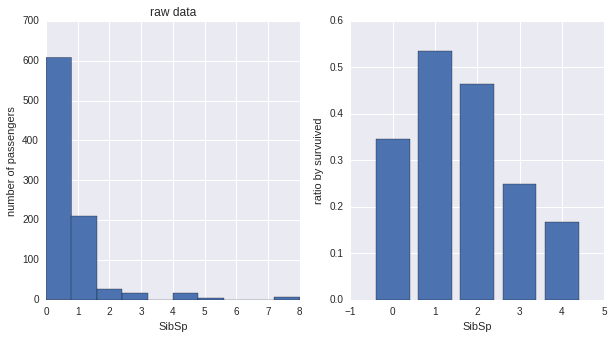

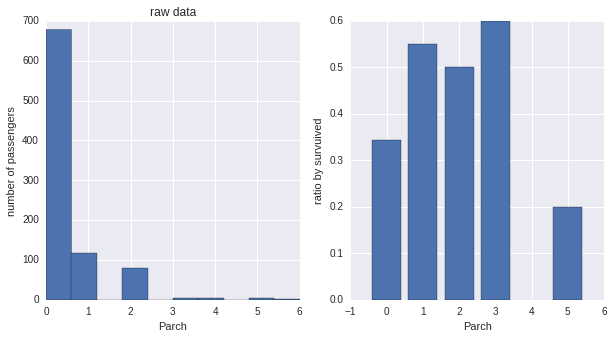

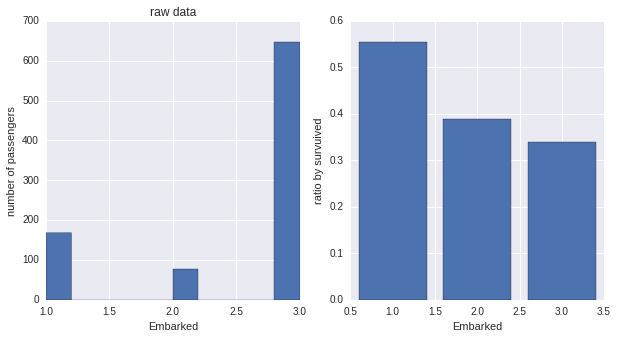

In [8]:
for col in [u'Pclass', u'Sex',u'SibSp', u'Parch',u'Embarked']:
    f,axarr = plt.subplots(nrows=1,ncols=2,sharex='col',figsize=(10,5))
    axarr[0].hist(df_train[col])
    axarr[0].set_xlabel(col)
    axarr[0].set_ylabel('number of passengers')
    axarr[0].set_title('raw data')

    survived_ratio_pclass = df_train[df_train['Survived']==1][col].value_counts() / df_train[col].value_counts().astype(float)
    axarr[1].bar(survived_ratio_pclass.index,survived_ratio_pclass,align='center')
    axarr[1].set_xlabel(col)
    axarr[1].set_ylabel('ratio by survuived')
    plt.show()


# Age

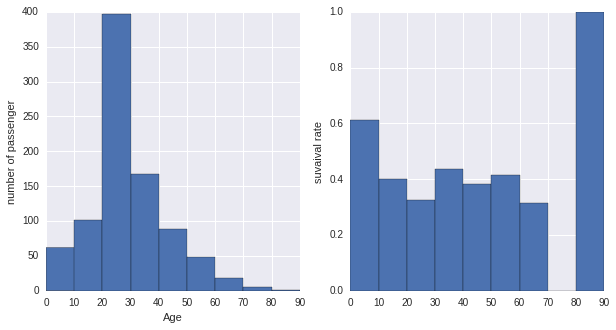

In [9]:
#plot histgram with interval (0-9,10-19,....,80-89)
frequencies = np.histogram(df_train['Age'].values,bins=np.arange(0,100,10))
frequencies_survived = np.histogram(df_train[df_train['Survived']==1]['Age'].values,bins=np.arange(0,100,10))
rate_surviver_by_age = frequencies_survived[0] / frequencies[0].astype(float)

f,axarr = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axarr[0].hist(df_train['Age'],bins=np.arange(0,100,10))
axarr[0].set_xlabel('Age')
axarr[0].set_ylabel('number of passenger')

axarr[1].bar(np.arange(5,90,10),rate_surviver_by_age,align='center',width=10)
axarr[1].set_ylabel('suvaival rate')
plt.show()

# Fare

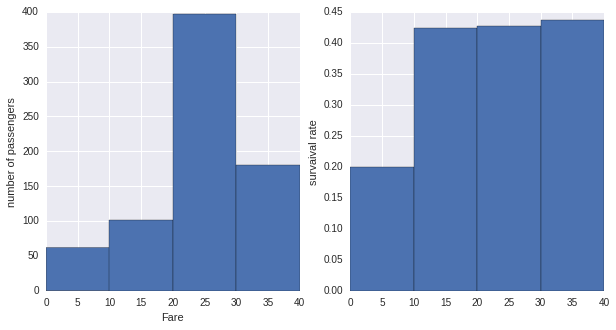

In [10]:
#plot histogram with interval (0-9,10-19,20-29,30-39)
frequencies = np.histogram(df_train['Fare'].values,bins=4,range=(df_train['Fare'].values.min(),40))
frequencies_survived = np.histogram(df_train[df_train['Survived']==1]['Fare'].values,bins=4,range=(df_train['Fare'].values.min(),40))
rate_surviver_by_fare = frequencies_survived[0] / frequencies[0].astype(float)

f, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axarr[0].hist(df_train['Age'],bins=np.arange(0,50,10))
axarr[0].set_xlabel('Fare')
axarr[0].set_ylabel('number of passengers')

axarr[1].bar(np.arange(5,40,10),rate_surviver_by_fare,align='center',width=10)
axarr[1].set_ylabel('survaival rate')
plt.show()

# one hot encoding

In [11]:
inv_class_mapping = {v:k for k,v in embarked_mapping.items()}
df_train['Embarked'] = df['Embarked'].map(inv_class_mapping)
dummy_embarked = pd.get_dummies(df_train['Embarked'],prefix='Embarked')
df_X = pd.concat([df_train,dummy_embarked],axis=1)

In [12]:
df_X = df_X.drop('Embarked',axis=1)

In [13]:
df_X.columns

Index([   u'Survived', u'PassengerId',      u'Pclass',         u'Sex',
               u'Age',       u'SibSp',       u'Parch',        u'Fare',
        u'Embarked_C',  u'Embarked_Q',  u'Embarked_S'],
      dtype='object')

# satandardization

In [14]:
X = df_X.loc[:,[u'Pclass', u'Sex', u'Age',u'SibSp', u'Parch', u'Fare',u'Embarked_C',  u'Embarked_Q',  u'Embarked_S']].values
y = df_X.iloc[:,0].values
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
rate_values_list = [2,3,4,5]
X_std_all = std.fit_transform(X)
X_std_part = X
for i in rate_values_list:
    X_std_part[:,i] = X_std_all[:,i]

# perceptron

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(n_iter=20000,eta0=0.001,random_state=0,shuffle=True)
ppn.fit(X_std_all,y)
y_pred_all = ppn.predict(X_std_all)

print('Accuracy: %.2f')%accuracy_score(y,y_pred_all)

Accuracy: 0.70


In [16]:
ppn = Perceptron(n_iter=20000,eta0=0.001,random_state=0,shuffle=True)
ppn.fit(X_std_part,y)
y_pred_part = ppn.predict(X_std_part)

print('Accuracy: %.2f')%accuracy_score(y,y_pred_part)

Accuracy: 0.76


In [17]:
np.arange(1000,20001,1000)

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000, 20000])

In [18]:
predict_part = []
predict_all = []

for i in np.arange(1000,20001,1000):
    ppn = Perceptron(n_iter=i,eta0=0.001,random_state=0,shuffle=True)
    ppn.fit(X_std_all,y)
    predict_all.append(accuracy_score(y,ppn.predict(X_std_all)))
    ppn.fit(X_std_part,y)
    predict_part.append(accuracy_score(y,ppn.predict(X_std_part)))

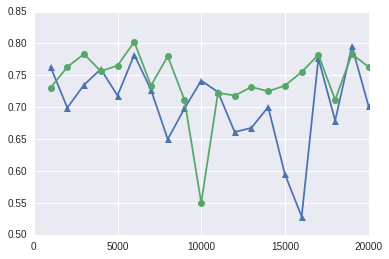

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(1000,20001,1000),predict_all,marker='^')
plt.plot(np.arange(1000,20001,1000),predict_part,marker='o')

plt.show()

# Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
tree.fit(X_std_all,y)
y_pred_all = tree.predict(X_std_all)
print('Accuracy: %.2f')%accuracy_score(y,y_pred_all)

tree.fit(X_std_part,y)
y_pred_part = tree.predict(X_std_part)
print('Accuracy: %.2f')%accuracy_score(y,y_pred_part)

Accuracy: 0.85
Accuracy: 0.85


# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,random_state=0)
lr.fit(X_std_all,y)
y_pred_all = lr.predict(X_std_all)
print('Accuracy: %.2f') % accuracy_score(y,y_pred_all)

lr.fit(X_std_part,y)
y_pred_part = lr.predict(X_std_part)
print('Accuracy: %.2f') % accuracy_score(y,y_pred_part)


Accuracy: 0.80
Accuracy: 0.80


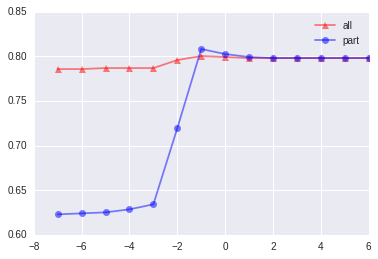

In [36]:
C = np.arange(-7,7)
part_predicts = []
all_predicts = []
for c in C:
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_std_all,y)
    y_pred_all = lr.predict(X_std_all)
    all_predicts.append(accuracy_score(y,y_pred_all))
    lr.fit(X_std_part,y)
    y_pred_part = lr.predict(X_std_part)
    part_predicts.append(accuracy_score(y,y_pred_part))

plt.plot(C,all_predicts,c='red',marker='^',alpha=0.5,label='all')
plt.plot(C,part_predicts,c='blue',marker='o',alpha=0.5,label='part')
plt.legend()
plt.show()

# Support Vector Machine

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=10,random_state=0)
svm.fit(X_std_all,y)
y_pred_all = svm.predict(X_std_all)
print('accuracy : %.2f') % accuracy_score(y,y_pred_all)

svm.fit(X_std_part,y)
y_pred_part = svm.predict(X_std_part)
print('accuracy : %.2f') % accuracy_score(y,y_pred_part)

accuracy : 0.79
accuracy : 0.79


In [48]:
svm = SVC(kernel='rbf',C=1.0,random_state=0,gamma=1)
svm.fit(X_std_all,y)
y_pred_all = svm.predict(X_std_all)
print('accuracy : %.2f') % accuracy_score(y,y_pred_all)

svm.fit(X_std_part,y)
y_pred_part = svm.predict(X_std_part)
print('accuracy : %.2f') % accuracy_score(y,y_pred_part)

accuracy : 0.88
accuracy : 0.87


# Rndom forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0,n_jobs=-1)
forest.fit(X_std_part,y)
y_pred_part = forest.predict(X_std_part)
print('accuracy :%.2f') % accuracy_score(y,y_pred_part)

accuracy :0.98


# k-nearet neighbor 

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
knn.fit(X_std_part,y)
y_pred_all = knn.predict(X_std_part)
print('accuracy: %.2f') % accuracy_score(y,y_pred_all)

accuracy: 0.85


In [113]:
df_test = pd.read_csv('test.csv')

In [114]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [115]:
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr.fit(df[['Age']].values)
df_test['Age'] = imr.transform(df_test[['Age']].values)

In [116]:
imr.fit(df[['Fare']].values)
df_test['Fare'] = imr.transform(df_test[['Fare']].values)

In [117]:
sex_mapping = {'female':0,'male':1}
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

In [118]:
Embarked_dummies = pd.get_dummies(df_test['Embarked'],prefix='Embarked')
df_test = pd.concat([df_test,Embarked_dummies],axis=1)

In [119]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0


In [120]:
X_test = df_test.loc[:,[u'Pclass', u'Sex', u'Age',u'SibSp', u'Parch', u'Fare',u'Embarked_C',  u'Embarked_Q',  u'Embarked_S']].values

In [122]:
y_pred = forest.predict(X_test)

In [123]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [125]:
submissions = pd.DataFrame({
        'PassengerId':df_test['PassengerId'].values,
        'Survived':y_pred
    })

In [127]:
submissions.to_csv('submission.csv',index=False)